In [47]:
import networkx as nx
import markov_clustering as mc
import numpy as np
import scipy as sp
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [42]:
PDA1_degree_824 = pd.read_csv("824_PDA1_degree.csv")
PDA1_weighted_centrality_824 = pd.read_csv("824_PDA1_weighted_centrality.csv")

PDA1_degree_864 = pd.read_csv("864_PDA1_degree.csv")
PDA1_weighted_centrality_864 = pd.read_csv("864_PDA1_weighted_centrality.csv")


In [43]:
PDA1_degree_824_dic = dict(zip(PDA1_degree_824['0'], PDA1_degree_824['1']))
PDA1_weighted_centrality_824_dic = dict(zip(PDA1_weighted_centrality_824['0'], PDA1_weighted_centrality_824['1']))

PDA1_degree_864_dic = dict(zip(PDA1_degree_864['0'], PDA1_degree_864['1']))
PDA1_weighted_centrality_864_dic = dict(zip(PDA1_weighted_centrality_864['0'], PDA1_weighted_centrality_864['1']))


In [44]:
PDA1_weighted_centrality_824_dic = dict(zip(PDA1_weighted_centrality_824['0'], PDA1_weighted_centrality_824['1']))
PDA1_weighted_centrality_864_dic = dict(zip(PDA1_weighted_centrality_864['0'], PDA1_weighted_centrality_864['1']))

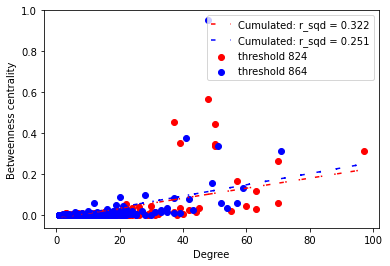

In [52]:
bc_deg_824 = {}
for key in PDA1_weighted_centrality_824_dic.keys():
    for k in PDA1_degree_824_dic.keys():
        if k == key:
            bc_deg_824[key] = (PDA1_weighted_centrality_824_dic[key], PDA1_degree_824_dic[k])

bc_deg_864 = {}
for key in PDA1_weighted_centrality_864_dic.keys():
    for k in PDA1_degree_864_dic.keys():
        if k == key:
            bc_deg_864[key] = (PDA1_weighted_centrality_864_dic[key], PDA1_degree_864_dic[k])


            
all_values_824 = bc_deg_824.values()
all_values_864 = bc_deg_864.values()
x = []
y = []
for a in all_values_824:
    x.append(a[1])
    y.append(a[0])
    
x2 = []
y2 = []
for a in all_values_864:
    x2.append(a[1])
    y2.append(a[0])

plt.scatter(x, y, color="r", label='threshold 824')
plt.scatter(x2, y2, color='b', label='threshold 864')
plt.xlabel('Degree')
plt.ylabel('Betweenness centrality')

x = np.array(x)
y = np.array(y)
a, b, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, a*x + b, color="red", label=f"Cumulated: r_sqd = {round(r_value**2,3)}",linestyle=(0,(3,10,1,10)), linewidth=1.5)

x2 = np.array(x2)
y2 = np.array(y2)
a, b, r_value, p_value, std_err = linregress(x2, y2)
plt.plot(x, a*x + b, color="blue", label=f"Cumulated: r_sqd = {round(r_value**2,3)}",linestyle=(0,(3,10,1,10)), linewidth=1.5)

plt.legend()
plt.savefig("centrality_degree")